In [1]:
from qiskit import *
from qiskit.tools.visualization import array_to_latex , plot_histogram, plot_bloch_multivector
from math import pi
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.tools.monitor import job_monitor
from qiskit.extensions import Initialize
%matplotlib inline

In [2]:
IBMQ.save_account('bc198117720621ce2cefda12b1cf37946028d7cc2c6268b849ccebfc45a5495107087dc658b5b5b126029c6376b395d2ab21610dd03478183c4b0ce60f0d182f')


/tmp/ipykernel_24466/742870634.py:1: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account('bc198117720621ce2cefda12b1cf37946028d7cc2c6268b849ccebfc45a5495107087dc658b5b5b126029c6376b395d2ab21610dd03478183c4b0ce60f0d182f')
/tmp/ipykernel_24466/742870634.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account('bc198117720621ce2cefda12b1cf37946028

In [3]:
# Creating class and methods for both quantum simulators and real Quantum computers

class Simulators():

    def StateVectorSimulator(circuit):
        simulator = Aer.get_backend('statevector_simulator')
        statevector = execute(circuit, backend=simulator).result().get_statevector()
        return statevector

    def QasmSimulator(circuit, shots):
        simulator = Aer.get_backend('qasm_simulator')
        counts = execute(circuit, backend=simulator, shots=shots).result().get_counts()
        return counts

    def UnitarySimulator(circuit):
        simulator = Aer.get_backend('unitary_simulator')
        unitary = execute(circuit, backend=simulator).result().get_unitary()
        return unitary
    
class QuantumComputer():
    def __init__(self, name, circuit, shots):
        self.Quantum = name
        self.circuit = circuit
        self.shots = shots
        
    def RealQuantumComputer(self):
        provider = IBMQ.load_account()
        q_computer = provider.get_backend(self.Quantum)
        transpiled_circuit = transpile(self.circuit, q_computer)
        job = execute(transpiled_circuit, backend = q_computer, shots = self.shots)
        print(job.job_id())
        job_monitor(job)
        return job_monitor , job
    

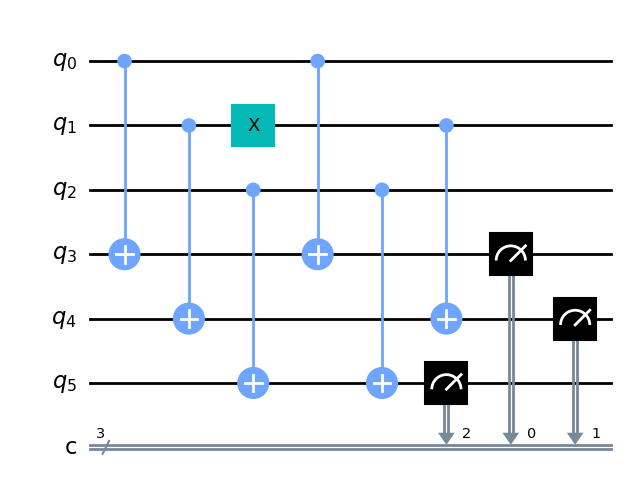

In [4]:
qc = QuantumCircuit(6,3)
qc.cx([0,1,2],[3,4,5])
qc.x(1)
qc.cx([0,1,2],[3,4,5])
qc.measure([3,4,5],[0,1,2])
qc.draw('mpl')

In [5]:
syndromes = Simulators.QasmSimulator(qc,1024)
print("Syndromes: ", syndromes)

Syndromes:  {'010': 1024}


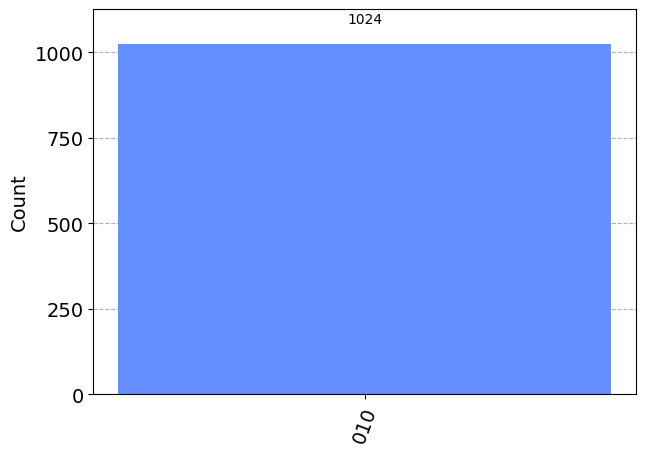

In [6]:
plot_histogram(syndromes)

In [7]:
most_frequent = syndromes.most_frequent()


In [8]:
error = []
for i , j in enumerate(most_frequent):
    error.append(int(j))
print(error)

[0, 1, 0]


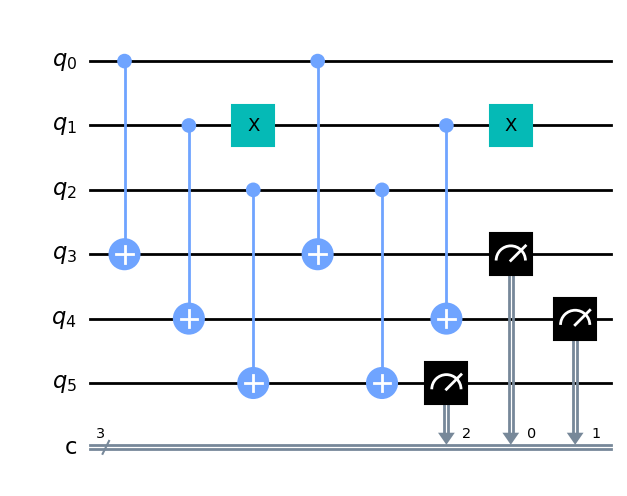

In [9]:
for i in range(len(error)):
    if error[i] == 1:
        qc.x(i)
qc.draw('mpl')

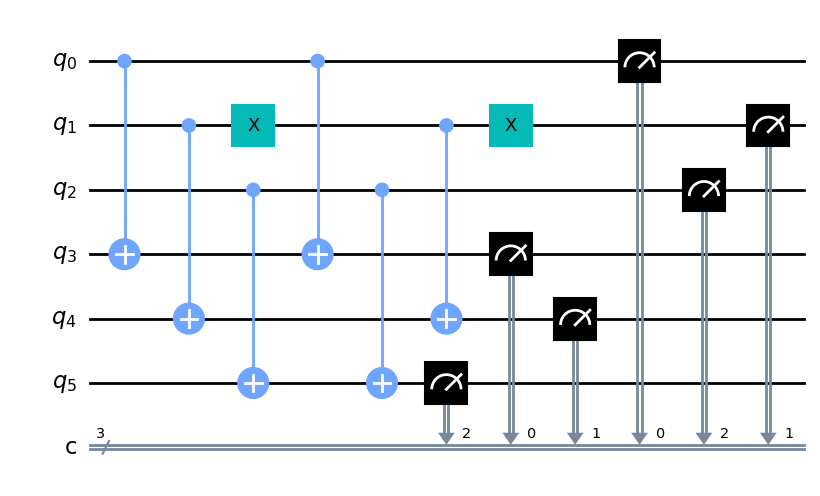

In [10]:
qc.measure([0,1,2],[0,1,2])

qc.draw('mpl')

In [11]:
corrected_measurement = Simulators.QasmSimulator(qc,1024)
print(corrected_measurement)

{'000': 1024}


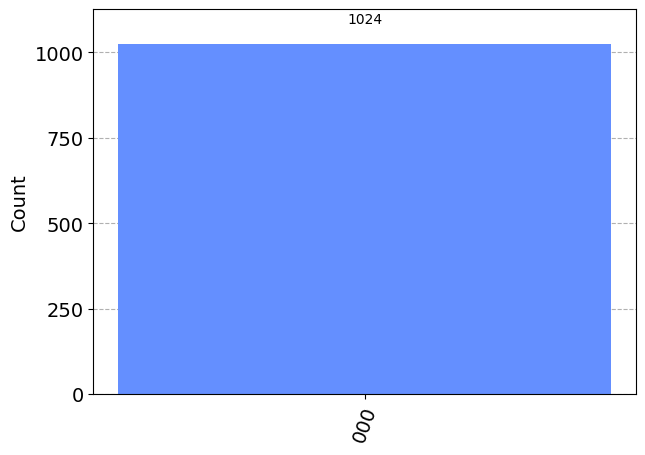

In [12]:
plot_histogram(corrected_measurement)

## Running on a real quantum hardware

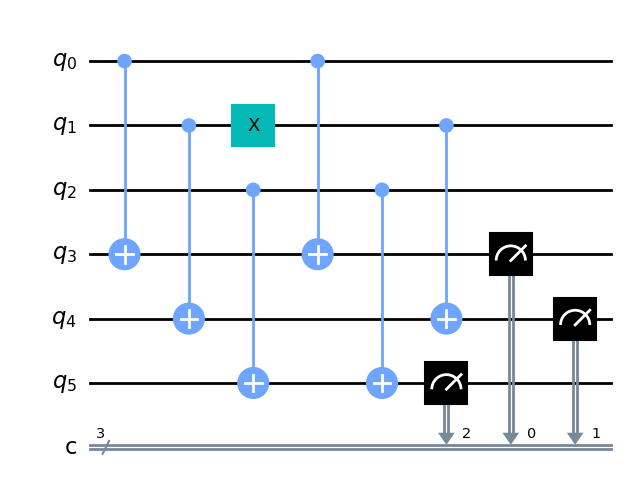

In [13]:
real_circuit = QuantumCircuit(6,3)
real_circuit.cx([0,1,2],[3,4,5])

real_circuit.x(1)

real_circuit.cx([0,1,2],[3,4,5])

real_circuit.measure([3,4,5],[0,1,2])

real_circuit.draw('mpl')

In [14]:
qcom = QuantumComputer('ibm_osaka', real_circuit, 1024)

job_monitor , job = qcom.RealQuantumComputer()

cnrw75mbrwpg0080qzqg
Job Status: job has successfully run


In [16]:
job_result = job.result()

quantum_syndromes = job_result.get_counts(real_circuit)
print(quantum_syndromes)

{'001': 2, '110': 9, '111': 1, '000': 37, '010': 956, '011': 19}


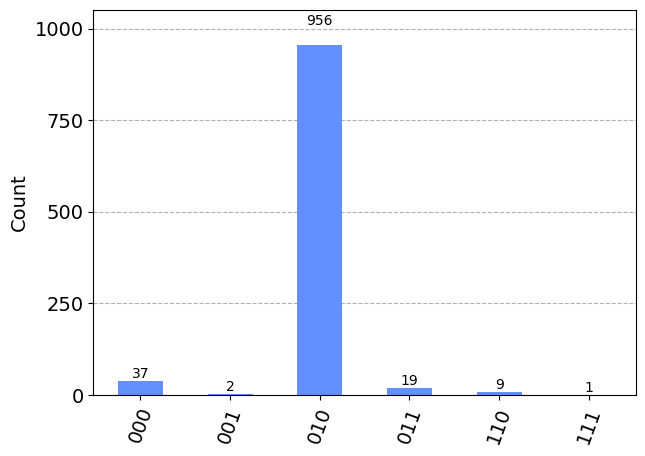

In [22]:
plot_histogram(quantum_syndromes)

In [17]:
quantum_most_frequent =  quantum_syndromes.most_frequent()
print(quantum_most_frequent)

010


In [18]:
quantum_error = []
for i, j in enumerate(quantum_most_frequent):
    quantum_error.append(int(j))
    
print(quantum_error)

[0, 1, 0]


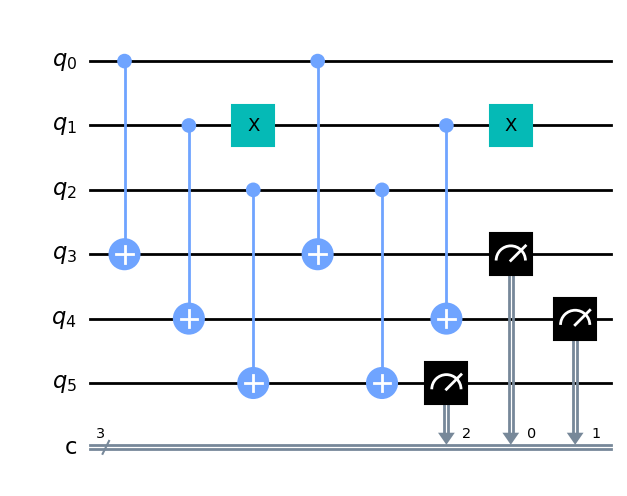

In [19]:
for i in range(len(quantum_error)):
    if quantum_error[i] == 1:
        real_circuit.x(i)
        
real_circuit.draw('mpl')

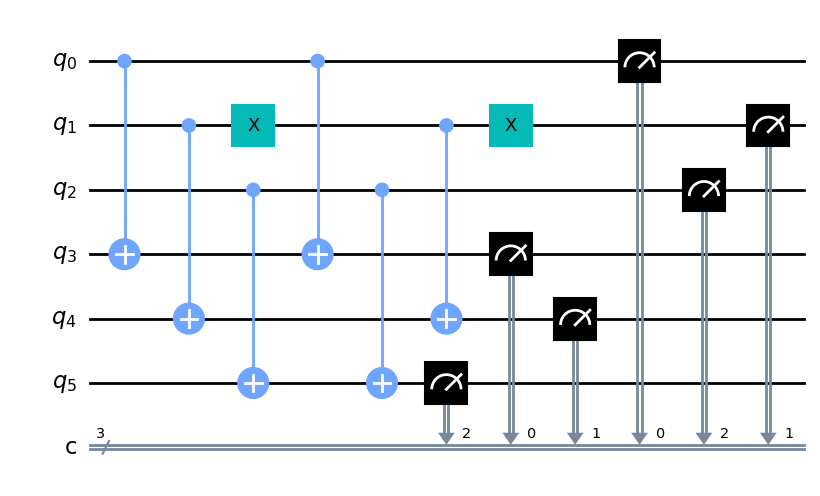

In [20]:
real_circuit.measure([0,1,2],[0,1,2])
real_circuit.draw('mpl')

In [21]:
qcom_2 = QuantumComputer('ibm_osaka', real_circuit, 1024)
q_com_job_monitor, q_com_job =qcom_2.RealQuantumComputer()

ibmqfactory.load_account:WARNING:2023-12-07 16:53:55,705: Credentials are already in use. The existing account in the session will be replaced.


cnrzhbnzeg00008v8nf0
Job Status: job has successfully run


In [23]:
q_com_job_result = q_com_job.result()

corrected_measurement = q_com_job_result.get_counts(real_circuit)

print(corrected_measurement)

{'001': 23, '010': 19, '000': 975, '100': 7}


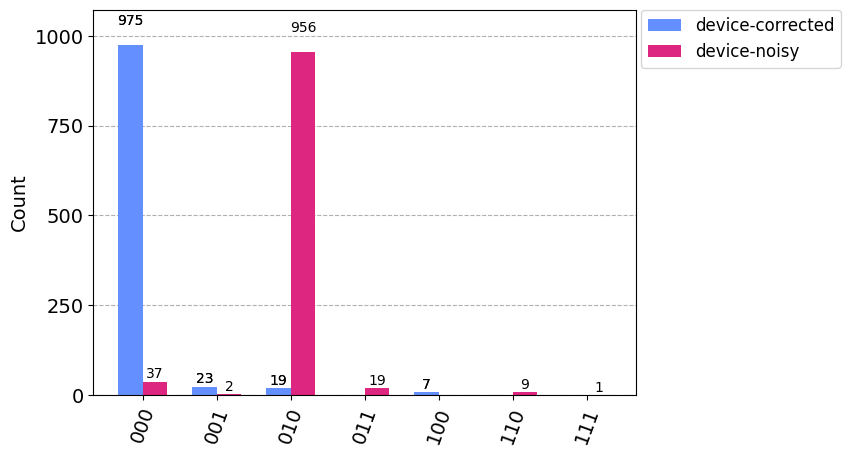

In [27]:
plot_histogram([corrected_measurement, quantum_syndromes], legend=['device-corrected', 'device-noisy'])